In [1]:
import glob
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
results = []
for filename in glob.glob(os.path.expanduser("~/dsi/good-food-purchasing-nova-classification/test-results/try5/gpt-4.1-nano/*.csv")):
    results.append(pd.read_csv(filename, header=None, names=["index", "P1", "P2", "P3", "P4", "truth"]))

results = pd.concat(results).set_index("index").sort_index()
results

,P1,P2,P3,P4,truth
index,,,,,
0,3.514684e-05,2.546029e-06,5.910793e-03,9.940426e-01,4
1,9.940412e-01,5.910785e-03,1.292979e-05,0.000000e+00,3
2,9.999244e-01,0.000000e+00,0.000000e+00,0.000000e+00,1
3,2.501876e-04,4.207507e-02,9.576242e-01,9.023172e-07,4
4,1.342501e-07,4.732478e-06,9.889993e-01,1.098679e-02,2
...,...,...,...,...,...
210,9.237414e-09,7.123129e-10,1.067700e-06,9.999959e-01,3
211,9.999682e-01,6.962086e-06,5.602615e-09,0.000000e+00,2
212,8.764181e-08,3.927834e-07,9.999928e-01,1.209858e-06,3


In [3]:
results[["P1", "P2", "P3", "P4"]].sum(axis=1).describe()

count    215.000000
mean       0.999938
std        0.000113
min        0.999080
25%        0.999934
50%        0.999971
75%        0.999992
max        1.000000
dtype: float64

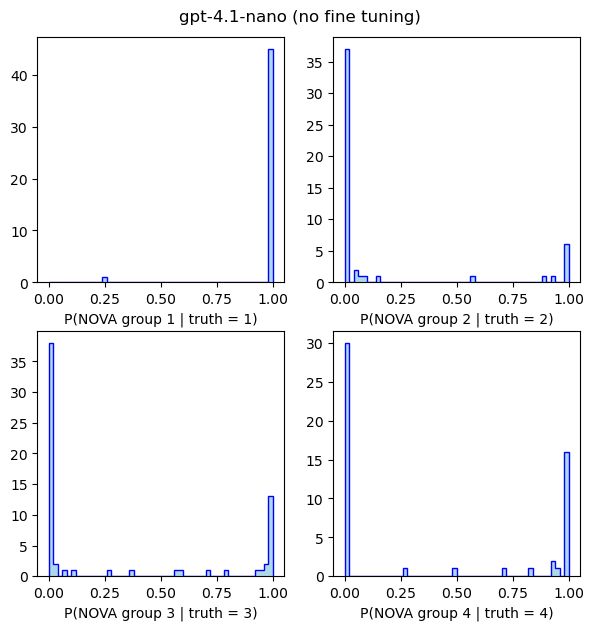

In [4]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(7, 7))

ax1.hist(results.query("truth == 1")["P1"], bins=50, range=(0, 1), histtype="step", fill=True, color="lightblue", edgecolor="blue")
ax1.set_xlabel("P(NOVA group 1 | truth = 1)")

ax2.hist(results.query("truth == 2")["P2"], bins=50, range=(0, 1), histtype="step", fill=True, color="lightblue", edgecolor="blue")
ax2.set_xlabel("P(NOVA group 2 | truth = 2)")

ax3.hist(results.query("truth == 3")["P3"], bins=50, range=(0, 1), histtype="step", fill=True, color="lightblue", edgecolor="blue")
ax3.set_xlabel("P(NOVA group 3 | truth = 3)")

ax4.hist(results.query("truth == 4")["P4"], bins=50, range=(0, 1), histtype="step", fill=True, color="lightblue", edgecolor="blue")
ax4.set_xlabel("P(NOVA group 4 | truth = 4)")

fig.suptitle("gpt-4.1-nano (no fine tuning)", y=0.92)

None